# Índice:

- Juego de la vida:
    - Creador
    - Como funciona, distintos patrones
- Métodos de Elementos Espectrales de Galerkin
    - Espacio $L^2$
    - Polinomios de Legendre
    - Condiciones
- Ecuación de calor

In [1]:
import numpy as np  
import numpy.polynomial.legendre as npl
import sympy as sp
import matplotlib.pyplot as plt
from scipy.special import legendre
from scipy.interpolate import lagrange
from math import exp

In [2]:
def Transformation(nodes, weight,a,b):
    nodes=(b-a)/2*nodes+(a+b)/2
    weight=(b-a)/2 *weight
    return (nodes,weight)

In [3]:
def chop(lista):
    for i in range(len(lista)):
        if(abs(lista[i])<(10**(-10))):
            lista[i]=0
    return lista

In [4]:
class Cuadrature:
    def __init__(self,nodes=None,weight=None):
        if(list(nodes)!=None):
                self.nodes=nodes
        if(list(weight)!=None):
                self.weight=weight
        
    def getNodes(self):
        return self.nodes
    def getWeight(self):
        return self.weight
    def getNumPoints(self):
        return len(self.nodes)
    
    def Integrate(self,f):
        return self.Integrate_List(f(np.array(self.nodes)))
    
    def Integrate_List(self,lista):
        if (len(lista)==len(self.weight)):
            return np.array(lista).dot(np.array(self.weight))
        else:
            raise Exception("No has metido correctamente la lista")

In [5]:
class Lobato(Cuadrature):
    def __init__(self, num_points,a,b):
        aux=[-1,*sorted(list(legendre(num_points).deriv().r)),1]
        Cuadrature.__init__(self, nodes=np.array(aux), weight=np.array(2/(num_points*(num_points+1)*(legendre(num_points)(aux))**2)))
        self.nodes,self.weight=Transformation(self.nodes, self.weight, a, b)
    def __str__(self):
        return "Nodos: %s \nPesos: %s " %(self.nodes,self.weight)

In [6]:
class Legendre(Cuadrature):
    def __init__(self,num_points,a,b):
        Cuadrature.__init__(self,nodes=npl.leggauss(num_points)[0], weight=npl.leggauss(num_points)[1]) 
        self.nodes,self.weight=Transformation(self.nodes, self.weight, a, b)
    def __str__(self):
        return "Nodos: %s \nPesos: %s " %(self.nodes,self.weight)

In [7]:
class Trapecio_Compuesto(Cuadrature): #están considerados los extremos(-1,1)
    def __init__(self,num_points,a,b):
        Cuadrature.__init__(self, nodes=np.array([*np.arange(-1,1,float(2/num_points)).tolist(),1]), weight=np.array([2/(2*num_points),*[2/num_points]*(num_points-1),2/(2*num_points)]))
        self.nodes,self.weight=Transformation(self.nodes, self.weight, a, b)
    def __str__(self):
        return "Nodos: %s \nPesos: %s " %(self.nodes,self.weight)

Hacemos interpolación en vez de continuar con phi

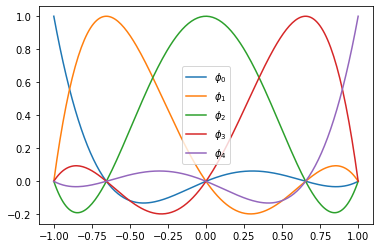

In [8]:
N=4
x = sp.symbols('x')
Ln = lambda x:chop(legendre(4))(x)
Lnp= lambda x:chop(legendre(4)).deriv()(x)
xvals = chop(Lobato(N,-1,1).getNodes())

phi0=lambda x:lagrange(xvals,[1,0,0,0,0])(x)
difphi0=lambda x: lagrange(xvals,[1,0,0,0,0]).deriv()(x)
                                                                                    
phi1=lambda x:lagrange(xvals,[0,1,0,0,0])(x)
difphi1=lambda x: lagrange(xvals,[0,1,0,0,0]).deriv()(x)

phi2=lambda x:lagrange(xvals,[0,0,1,0,0])(x)
difphi2=lambda x: lagrange(xvals,[0,0,1,0,0]).deriv()(x)

phi3=lambda x:lagrange(xvals,[0,0,0,1,0])(x)
difphi3=lambda x: lagrange(xvals,[0,0,0,1,0]).deriv()(x)

phi4=lambda x:lagrange(xvals,[0,0,0,0,1])(x)
difphi4=lambda x: lagrange(xvals,[0,0,0,0,1]).deriv()(x)

xval=np.linspace(-1,1,200)
plt.plot(xval,phi0(xval),label="$\phi_0$")
plt.plot(xval,phi1(xval),label="$\phi_1$")
plt.plot(xval,phi2(xval),label="$\phi_2$")
plt.plot(xval,phi3(xval),label="$\phi_3$")
plt.plot(xval,phi4(xval),label="$\phi_4$")
plt.legend()

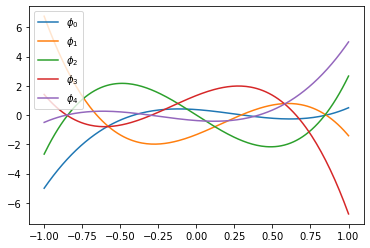

In [24]:
xval=np.linspace(-1,1,200)
plt.plot(xval,difphi0(xval),label="$\phi_0$")
plt.plot(xval,difphi1(xval),label="$\phi_1$")
plt.plot(xval,difphi2(xval),label="$\phi_2$")
plt.plot(xval,difphi3(xval),label="$\phi_3$")
plt.plot(xval,difphi4(xval),label="$\phi_4$")
plt.legend()

In [9]:
def Matriz_Local(m,p,Nq,num_interval): #p siempre será 4 en nuestra actividad
    
    intervals=np.linspace(-1,1,m+1)
    A=np.zeros((p+1, p+1))
    a=intervals[num_interval-1]
    b=intervals[num_interval]
    #xvals2=np.linspace(a,b,Nq)
    xvals2 = chop(Lobato(Nq-1,a,b).getNodes())

    print("Intervalo ",num_interval,": ",xvals2)
    
    A[0][0]=Lobato(Nq-1,a,b).Integrate_List(difphi0(xvals2)*difphi0(xvals2))
    A[0][1]=Lobato(Nq-1,a,b).Integrate_List(difphi0(xvals2)*difphi1(xvals2))
    A[0][2]=Lobato(Nq-1,a,b).Integrate_List(difphi0(xvals2)*difphi2(xvals2))
    A[0][3]=Lobato(Nq-1,a,b).Integrate_List(difphi0(xvals2)*difphi3(xvals2))
    A[0][4]=Lobato(Nq-1,a,b).Integrate_List(difphi0(xvals2)*difphi4(xvals2))
    
    A[1][0]=Lobato(Nq-1,a,b).Integrate_List(difphi1(xvals2)*difphi0(xvals2))
    A[1][1]=Lobato(Nq-1,a,b).Integrate_List(difphi1(xvals2)*difphi1(xvals2))
    A[1][2]=Lobato(Nq-1,a,b).Integrate_List(difphi1(xvals2)*difphi2(xvals2))
    A[1][3]=Lobato(Nq-1,a,b).Integrate_List(difphi1(xvals2)*difphi3(xvals2))
    A[1][4]=Lobato(Nq-1,a,b).Integrate_List(difphi1(xvals2)*difphi4(xvals2))

    A[2][0]=Lobato(Nq-1,a,b).Integrate_List(difphi2(xvals2)*difphi0(xvals2))
    A[2][1]=Lobato(Nq-1,a,b).Integrate_List(difphi2(xvals2)*difphi1(xvals2))
    A[2][2]=Lobato(Nq-1,a,b).Integrate_List(difphi2(xvals2)*difphi2(xvals2))
    A[2][3]=Lobato(Nq-1,a,b).Integrate_List(difphi2(xvals2)*difphi3(xvals2))
    A[2][4]=Lobato(Nq-1,a,b).Integrate_List(difphi2(xvals2)*difphi4(xvals2))

    A[3][0]=Lobato(Nq-1,a,b).Integrate_List(difphi3(xvals2)*difphi0(xvals2))
    A[3][1]=Lobato(Nq-1,a,b).Integrate_List(difphi3(xvals2)*difphi1(xvals2))
    A[3][2]=Lobato(Nq-1,a,b).Integrate_List(difphi3(xvals2)*difphi2(xvals2))
    A[3][3]=Lobato(Nq-1,a,b).Integrate_List(difphi3(xvals2)*difphi3(xvals2))
    A[3][4]=Lobato(Nq-1,a,b).Integrate_List(difphi3(xvals2)*difphi4(xvals2))

    A[4][0]=Lobato(Nq-1,a,b).Integrate_List(difphi4(xvals2)*difphi0(xvals2))
    A[4][1]=Lobato(Nq-1,a,b).Integrate_List(difphi4(xvals2)*difphi1(xvals2))
    A[4][2]=Lobato(Nq-1,a,b).Integrate_List(difphi4(xvals2)*difphi2(xvals2))
    A[4][3]=Lobato(Nq-1,a,b).Integrate_List(difphi4(xvals2)*difphi3(xvals2))
    A[4][4]=Lobato(Nq-1,a,b).Integrate_List(difphi4(xvals2)*difphi4(xvals2))
    
    return A

In [10]:
def Vector_Ind(m,p,Nq,num_interval,f): #p siempre será 4 en nuestra actividad
    
    intervals=np.linspace(-1,1,m+1)
    A=np.zeros(p+1)
    a=intervals[num_interval-1]
    b=intervals[num_interval]
     #xvals2=np.linspace(a,b,Nq)
    xvals2 = chop(Lobato(Nq-1,a,b).getNodes())
    
      
    A[0]=Lobato(Nq-1,a,b).Integrate_List(f(xvals2)*phi0(xvals2))
    A[1]=Lobato(Nq-1,a,b).Integrate_List(f(xvals2)*phi1(xvals2))
    A[2]=Lobato(Nq-1,a,b).Integrate_List(f(xvals2)*phi2(xvals2))
    A[3]=Lobato(Nq-1,a,b).Integrate_List(f(xvals2)*phi3(xvals2))
    A[4]=Lobato(Nq-1,a,b).Integrate_List(f(xvals2)*phi4(xvals2))
    
    return A

Al hacer la matriz local la incorporamos dentro de la global y luego al siguiente intervalo.

In [22]:
def Matriz_Global(m,p,Nq,f):#m es nº de intervalos
    
    AG=np.zeros((4*m+1, 4*m+1))
    BG=np.zeros(4*m+1)
    for k in range(0,m):
        A=Matriz_Local(m,p,Nq,k+1)
        B=Vector_Ind(m,p,Nq,k+1,f)
        for i in range(0,p+1):
            BG[k*p+i]=BG[k*p+i]+B[i]
            for j in range(0,p+1):
                AG[k*p+i][k*p+j] = AG[k*p+i][k*p+j] + A[i][j]
                print("int",k+1,"k*p+i:",k*p+i," k*p+j:",k*p+j," k,i,j",k,i,j," sol:",AG[k*p+i][k*p+j] )
    return (AG,BG)

Intervalo  1 :  [-1.         -0.88488456 -0.66666667 -0.44844878 -0.33333333]
int 1 k*p+i: 0  k*p+j: 0  k,i,j 0 0 0  sol: 3.4062642889803403
int 1 k*p+i: 0  k*p+j: 1  k,i,j 0 0 1  sol: -3.5492293503354384
int 1 k*p+i: 0  k*p+j: 2  k,i,j 0 0 2  sol: 0.23142813595488398
int 1 k*p+i: 0  k*p+j: 3  k,i,j 0 0 3  sol: -0.1382801756514572
int 1 k*p+i: 0  k*p+j: 4  k,i,j 0 0 4  sol: 0.04981710105166881
int 1 k*p+i: 1  k*p+j: 0  k,i,j 0 1 0  sol: -3.5492293503354384
int 1 k*p+i: 1  k*p+j: 1  k,i,j 0 1 1  sol: 4.820147777576633
int 1 k*p+i: 1  k*p+j: 2  k,i,j 0 1 2  sol: -1.695450150779024
int 1 k*p+i: 1  k*p+j: 3  k,i,j 0 1 3  sol: 0.6386704262561609
int 1 k*p+i: 1  k*p+j: 4  k,i,j 0 1 4  sol: -0.21413870271832897
int 1 k*p+i: 2  k*p+j: 0  k,i,j 0 2 0  sol: 0.23142813595488398
int 1 k*p+i: 2  k*p+j: 1  k,i,j 0 2 1  sol: -1.695450150779024
int 1 k*p+i: 2  k*p+j: 2  k,i,j 0 2 2  sol: 1.9184067469389816
int 1 k*p+i: 2  k*p+j: 3  k,i,j 0 2 3  sol: -0.6784969101364848
int 1 k*p+i: 2  k*p+j: 4  k,i,j 

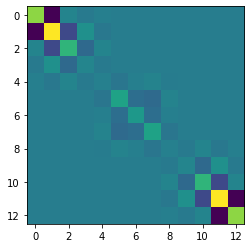

[[ 3.40626429 -3.54922935  0.23142814 -0.13828018  0.0498171   0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-3.54922935  4.82014778 -1.69545015  0.63867043 -0.2141387   0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.23142814 -1.69545015  1.91840675 -0.67849691  0.22411218  0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-0.13828018  0.63867043 -0.67849691  0.26830419 -0.09019753  0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.0498171  -0.2141387   0.22411218 -0.09019753  0.09373571 -0.2734582
   0.07779302  0.18197062 -0.0496342   0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.         -0.2734582   1.26339989
  -0.52975664 -0.64215567  0.18197062  0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.07779302 -0.52975664
   0.90392725 -0.52975664  0.

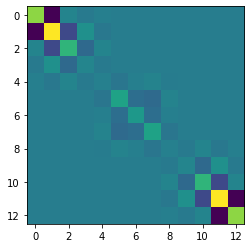

[7.47572179e+15 7.47572179e+15 7.47572179e+15 7.47572179e+15
 7.47572179e+15 7.47572179e+15 7.47572179e+15 7.47572179e+15
 7.47572179e+15 7.47572179e+15 7.47572179e+15 7.47572179e+15
 7.47572179e+15]


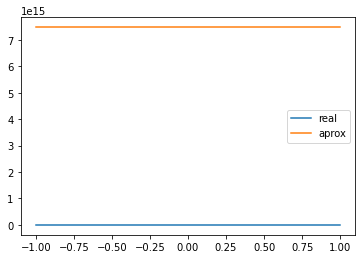

In [25]:
f= lambda x: -2
real = lambda x: x**2-1
AG,BG=Matriz_Global(3,4,5,f) #m=30 intervalos, p=4 siempre (grados de libertad), Nq=5 nodos de cuadratura 
print(AG,BG)
plt.imshow(AG)
plt.show()
#AG[0][0]=10**10
#BG[0]=10**10
#AG[len(AG)-1][len(AG)-1]=10**10
#BG[len(BG)-1]=10**10
print(AG,BG)
plt.imshow(AG)
plt.show()
X = np.linalg.solve(AG,BG)
print(X)

valores=np.linspace(-1,1,101)
plt.plot(valores,real(valores),label="real")
plt.plot(np.linspace(-1,1,len(X)),X,label="aprox")
plt.legend()

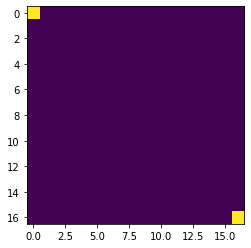

In [15]:
plt.imshow(AG)

$-u''=f$

Escribimos $f = -6x$, queremos hallar $u$ que debe ser $x(x+1)(x-1)$

In [74]:
f= lambda x:-6*x
AG,BG=Matriz_Global(100,4,5,f) #m=30 intervalos, p=4 siempre (grados de libertad), Nq=5 nodos de cuadratura

Intervalo  1 :  [-1.         -0.99654654 -0.99       -0.98345346 -0.98      ]
Intervalo  2 :  [-0.98       -0.97654654 -0.97       -0.96345346 -0.96      ]
Intervalo  3 :  [-0.96       -0.95654654 -0.95       -0.94345346 -0.94      ]
Intervalo  4 :  [-0.94       -0.93654654 -0.93       -0.92345346 -0.92      ]
Intervalo  5 :  [-0.92       -0.91654654 -0.91       -0.90345346 -0.9       ]
Intervalo  6 :  [-0.9        -0.89654654 -0.89       -0.88345346 -0.88      ]
Intervalo  7 :  [-0.88       -0.87654654 -0.87       -0.86345346 -0.86      ]
Intervalo  8 :  [-0.86       -0.85654654 -0.85       -0.84345346 -0.84      ]
Intervalo  9 :  [-0.84       -0.83654654 -0.83       -0.82345346 -0.82      ]
Intervalo  10 :  [-0.82       -0.81654654 -0.81       -0.80345346 -0.8       ]
Intervalo  11 :  [-0.8        -0.79654654 -0.79       -0.78345346 -0.78      ]
Intervalo  12 :  [-0.78       -0.77654654 -0.77       -0.76345346 -0.76      ]
Intervalo  13 :  [-0.76       -0.75654654 -0.75       -0.7434

In [75]:
AG[0][0]=10**30
BG[0]=10**30
AG[len(AG)-1][len(AG)-1]=10**30
BG[len(BG)-1]=10**30

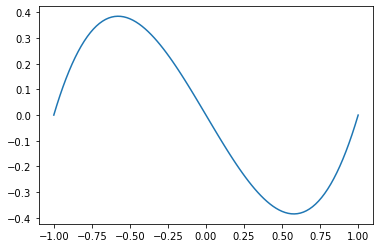

In [76]:
real= lambda x: x*(x+1)*(x-1) 
valores=np.linspace(-1,1,101)
plt.plot(valores,real(valores),label="real")

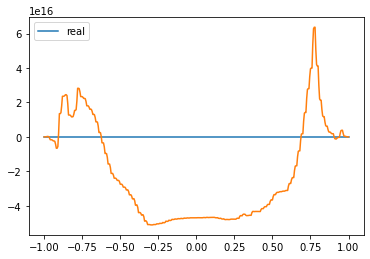

In [77]:
X = np.linalg.solve(AG,BG)

real= lambda x: x*(x+1)*(x-1) 
valores=np.linspace(-1,1,101)

plt.plot(valores,real(valores),label="real")
plt.plot(np.linspace(-1,1,len(X)),X)
plt.legend()

La gráfica real solo llega hasta 0.4 y esta en cambio sube hasta $4*10^{15}$, no se a que se debe.

Con 30 intervalos parece que sigue el "mismo" recorrido, pero con 100 se vuelve loco.

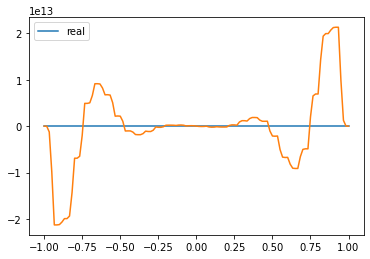

In [47]:
f= lambda x: -16*np.pi**2*np.cos(2*np.pi*x)*np.sin(2*np.pi*x)
real = lambda x: -np.sin(2*np.pi*x)*np.cos(2*np.pi*x)
AG,BG=Matriz_Global(30,4,5,f) #m=30 intervalos, p=4 siempre (grados de libertad), Nq=5 nodos de cuadratura 
AG[0][0]=10**30
BG[0]=10**30
AG[len(AG)-1][len(AG)-1]=10**30
BG[len(BG)-1]=10**30

X = np.linalg.solve(AG,BG)

plt.plot(valores,real(valores),label="real")
plt.plot(np.linspace(-1,1,len(X)),X)
plt.legend()

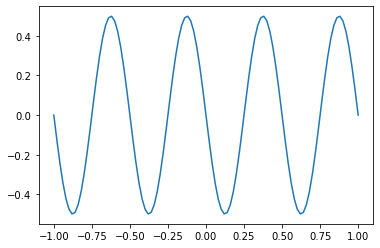

In [48]:
plt.plot(valores,real(valores))

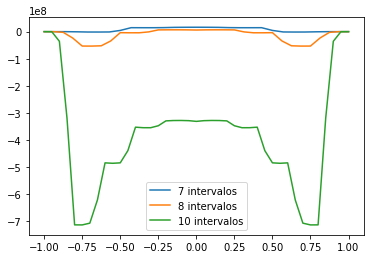

In [49]:
f=lambda x:2-12*x**2

AG,BG=Matriz_Global(7,4,5,f) #m=30 intervalos, p=4 siempre (grados de libertad), Nq=5 nodos de cuadratura 
AG[0][0]=10**30
BG[0]=10**30
AG[len(AG)-1][len(AG)-1]=10**30
BG[len(BG)-1]=10**30

X = np.linalg.solve(AG,BG)

plt.plot(np.linspace(-1,1,len(X)),X,label="7 intervalos")


AG,BG=Matriz_Global(8,4,5,f) #m=30 intervalos, p=4 siempre (grados de libertad), Nq=5 nodos de cuadratura 
AG[0][0]=10**30
BG[0]=10**30
AG[len(AG)-1][len(AG)-1]=10**30
BG[len(BG)-1]=10**30

X = np.linalg.solve(AG,BG)

plt.plot(np.linspace(-1,1,len(X)),X,label="8 intervalos")

AG,BG=Matriz_Global(10,4,5,f) #m=30 intervalos, p=4 siempre (grados de libertad), Nq=5 nodos de cuadratura 
AG[0][0]=10**30
BG[0]=10**30
AG[len(AG)-1][len(AG)-1]=10**30
BG[len(BG)-1]=10**30

X = np.linalg.solve(AG,BG)

plt.plot(np.linspace(-1,1,len(X)),X,label="10 intervalos")

plt.legend()

Baila muchísimo al variar los intervalos cuando debería mejorar.

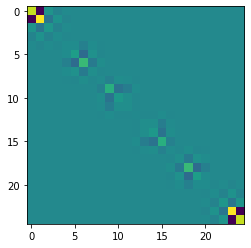

In [40]:
plt.imshow(AG)

In [ ]:
Forzar las condiciones de contorno Dirchlet especifican el valor de la frontera u(a)=u_a
La primera fila, 1000000, ultima 00001
Tambien sirve poner el primero por M=10**(30) grande, "bloquear los grados de libertad de la frontera" en la matriz global 
y en el termino independiente

Hay otras que se llaman naturales, Neumann homogenea nos dan u'(a)=u_a